This notebook demonstrates how to use the pre-trained models to predict emission intensity on the pre-compiled UCNP datasets, called SUNSET.  

In [8]:
from NanoParticleTools.machine_learning.data import SummedWavelengthRangeLabelProcessor
from NanoParticleTools.machine_learning.data.utils import get_sunset_datasets
from NanoParticleTools.machine_learning.models.hetero.intra_inter_model import HeteroDCVModel
from NanoParticleTools.machine_learning.models.hetero.intra_inter_data import HeteroDCVFeatureProcessor
from NanoParticleTools.inputs.nanoparticle import SphericalConstraint
from NanoParticleTools.machine_learning.util.wandb import model_from_file
from NanoParticleTools.machine_learning.data.datamodule import NPMCDataModule
import matplotlib.pyplot as plt
import numpy as np

First, download the SUNSET datasets from [Figshare](https://figshare.com/s/49222bae78f228363897). Then, we prepare a DataModule using the appropriate feature processor and label processor. In this case, since we are using the HeteroDCVModel, we use the HeteroDCVFeatureProcessor. We also define the label processor, which sums the wavelengths over the UCNP emisison spectra. 

In [3]:
train_dataset, val_dataset, iid_test_dataset, ood_test_dataset = get_sunset_datasets(
    sunset_ids=1,
    feature_processor_cls=HeteroDCVFeatureProcessor,
    label_processor_cls=SummedWavelengthRangeLabelProcessor,
    data_path=r"C:\Users\ChemeGrad2021\Desktop\NanoParticleTools",
    feature_processor_kwargs={'include_zeros': True},
    label_processor_kwargs={
        'spectrum_ranges': {
            'uv': (300, 450)
        },
        'log_constant': 100
    })
Hetero_data_module = NPMCDataModule(train_dataset, val_dataset, ood_test_dataset, iid_test_dataset, batch_size=16)

Now, we can load a pre-trained model checkpoint, which can be downloaded from [Figshare](https://figshare.com/articles/dataset/Hetero-GNN_Checkpoints/27941694/1?file=50919813). 

In [4]:
model_path = r"C:\Users\ChemeGrad2021\Desktop\NanoParticleTools\SUNSET-1\model_1.ckpt"
pre_trained_model = model_from_file(model_path, HeteroDCVModel)

Lightning automatically upgraded your loaded checkpoint from v1.7.7 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\ChemeGrad2021\Desktop\NanoParticleTools\SUNSET-1\model_1.ckpt`
c:\users\chemegrad2021\desktop\nanoparticletools\src\NanoParticleTools\machine_learning\models\hetero\intra_inter_model.py:260: UserWarning: Cannot override n_input_nodes for this model. It is inferred fromthe embed_dim.
  warnings.warn(


Finally, we can pass the SUNSET-1 test dataset into the model, and plot the distribution of log intensities. 

In [11]:
output = np.zeros((len(ood_test_dataset)))
for i in range(len(ood_test_dataset)):
    output[i] = pre_trained_model.predict_step(ood_test_dataset[i]).item()

Text(0.5, 1.0, 'Distribution of Predictions of SUNSET-1 OOD Test Set')

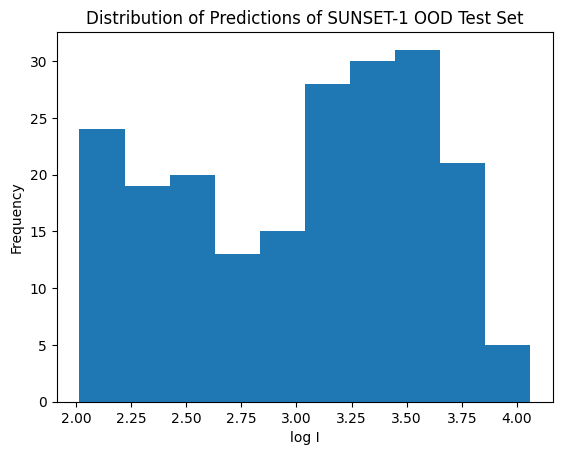

In [16]:
plt.hist(output)
plt.xlabel('log I')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions of SUNSET-1 OOD Test Set')